# Sales Analysis

### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os

### Merging 12 months of sales Data

In [2]:
april_data = pd.read_csv(r"Data\Sales_April_2019.csv")

In [3]:
april_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
april_data.shape

(18383, 6)

In [5]:
files = [file for file in os.listdir("Data")]

merge_data = pd.DataFrame()

for file in files:
    #print(file)
    month_data = pd.read_csv("Data/" + file)
    merge_data = pd.concat([merge_data, month_data])


### Saving Merged Data of 12 Months File

In [6]:
merge_data.to_csv("Merge_data.csv", index = False)

## Reading Merged Data File

In [7]:
df = pd.read_csv("Merge_data.csv")

In [8]:
df.shape

(186850, 6)

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Cleaning Data

#### Drop Rows of NaN

In [11]:
nan_df = df[df.isna().any(axis = 1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dropna(axis = 'index', how = 'all', inplace = True) # Drop NaN values If all the values in column is NaN

In [13]:
df.shape

(186305, 6)

#### Removing Header Which get added multiple times while merging Months data

In [14]:
df = df[df["Order ID"].str[:4] != 'Orde']

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [16]:
df.shape

(185950, 6)

In [17]:
df[df.isna().any(axis = 1)]

# all Null Values had been removed

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## Removing Duplicates

In [18]:
df[df.duplicated(keep="first")].sort_values(by = "Order ID") # These are the Duplicate Values We are keeping the first entry

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
68422,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
71673,145143,Lightning Charging Cable,1,14.95,01/06/19 03:01,"182 Jefferson St, San Francisco, CA 94016"
73358,146765,Google Phone,1,600,01/21/19 11:23,"918 Highland St, New York City, NY 10001"
74354,147707,Wired Headphones,1,11.99,01/04/19 16:50,"883 4th St, Dallas, TX 75001"
75681,148984,USB-C Charging Cable,1,11.95,01/08/19 17:36,"562 14th St, Boston, MA 02215"
...,...,...,...,...,...,...
50288,314675,AA Batteries (4-pack),1,3.84,12/26/19 09:01,"927 13th St, San Francisco, CA 94016"
50846,315204,Wired Headphones,1,11.99,12/12/19 12:41,"680 6th St, San Francisco, CA 94016"
51634,315955,ThinkPad Laptop,1,999.99,12/26/19 17:28,"588 Chestnut St, Seattle, WA 98101"
51861,316173,AAA Batteries (4-pack),1,2.99,12/22/19 22:44,"907 Sunset St, Portland, OR 97035"


In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df.shape

(185686, 6)

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [22]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

#### Converting 'Order Date' Column to Date Time Format

In [23]:
df.loc[0, "Order Date"]

'04/19/19 08:46'

In [24]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [25]:
df["Order Date"].dtypes

dtype('<M8[ns]')

In [26]:
df.loc[0,"Order Date"]

Timestamp('2019-04-19 08:46:00')

#### Adding Month Columns

In [27]:
df["Month"] = df["Order Date"].dt.month_name()

In [28]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


#### Changing Data Type Of Other Columns for Numerical Computation

In [29]:
df.shape

(185686, 7)

In [30]:
df["Order ID"].str.isdigit().sum() # we can see there is only Numbers in Order ID Colum so we can change its Data Type

185686

In [31]:
df["Order ID"] = df["Order ID"].astype(int) # changed DataType from Object to int

In [32]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)
df["Price Each"] = df["Price Each"].astype(float)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(3)
memory usage: 13.9+ MB


### Sorting As per Months

In [34]:
df["MonthInNumeric"] = df['Order Date'].dt.strftime('%m')

In [35]:
df["MonthInNumeric"] = df["MonthInNumeric"].astype(int)

In [36]:
df.sort_values(by = "MonthInNumeric", inplace = True)

In [37]:
df.reset_index(inplace = True)

In [38]:
df.drop(["index", "MonthInNumeric"], axis = "columns", inplace = True)

In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",January
1,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",January
2,144296,Lightning Charging Cable,1,14.95,2019-01-16 12:03:00,"946 Maple St, New York City, NY 10001",January
3,144295,USB-C Charging Cable,1,11.95,2019-01-15 14:39:00,"340 Madison St, San Francisco, CA 94016",January
4,144294,Google Phone,1,600.00,2019-01-13 09:56:00,"306 14th St, Los Angeles, CA 90001",January


## Analysis

#### Finding which was the best Month for sales and How much was Earned that Months

In [40]:
# Adding Sales Column
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [41]:
df.groupby(["Month"])["Sales"].sum().sort_values(ascending = False)

Month
December     4608295.70
October      3734777.86
April        3389217.98
November     3197875.05
May          3150616.23
March        2804973.35
July         2646461.32
June         2576280.15
August       2241083.37
February     2200078.08
September    2094465.69
January      1821413.16
Name: Sales, dtype: float64

### 'December' was the Best Month for Sales with sales of '4613443.34' and 'January' was worst month with sales of '1822256.73'

In [42]:
#result = df.groupby(["Month", "Product"])["Sales"].sum()
#result.loc["January"].sort_values(ascending = False)

In [43]:
result = df.groupby(["Month"]).sum()
#result
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
result = result.reindex(months_order)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_4964\2545648938.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = df.groupby(["Month"]).sum()


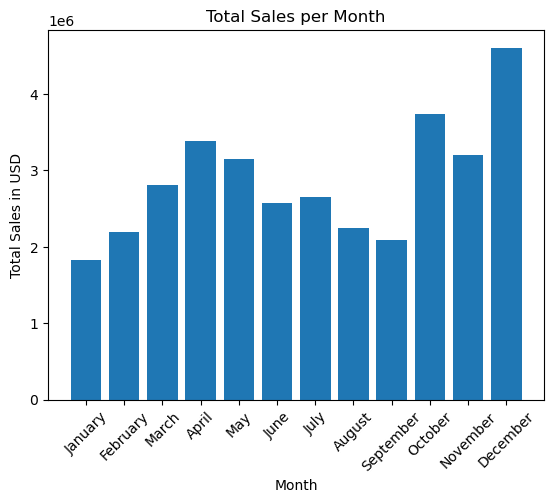

In [44]:
import matplotlib.pyplot as plt

# Plotting
#plt.grid()
plt.bar(result.index, result["Sales"])
plt.xlabel("Month")
plt.ylabel("Total Sales in USD")
plt.title("Total Sales per Month")
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability

plt.show()


#### With Graph we can also see that December has highest sales and January has Lowest Sales 

#### Finding which City was the highest Number of sales

##### Adding City Column

In [45]:
pd.Series(df["Purchase Address"].str.split(",").str[1:3].apply(lambda x: ",".join(x)).unique())

0            Boston, MA 02215
1           Atlanta, GA 30301
2     New York City, NY 10001
3     San Francisco, CA 94016
4       Los Angeles, CA 90001
5            Austin, TX 73301
6            Dallas, TX 75001
7           Seattle, WA 98101
8          Portland, OR 97035
9          Portland, ME 04101
dtype: object

In [46]:
''' In this DataSet we have Portland with two different state i.e Portland(OR)' and Portland (ME) thats why we are considering 
city code as well and not going with the city name only'''

" In this DataSet we have Portland with two different state i.e Portland(OR)' and Portland (ME) thats why we are considering \ncity code as well and not going with the city name only"

In [47]:
#df["City"] = df["Purchase Address"].apply(lambda x : x.split(",")[1])

df["City"] = df["Purchase Address"].str.split(",").str[1] + " "+ "(" + df["Purchase Address"].str.split(",").str[2].str.split(" ").str[1]+ ")"

In [48]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",January,2.99,Boston (MA)
1,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",January,300.00,Atlanta (GA)
2,144296,Lightning Charging Cable,1,14.95,2019-01-16 12:03:00,"946 Maple St, New York City, NY 10001",January,14.95,New York City (NY)
3,144295,USB-C Charging Cable,1,11.95,2019-01-15 14:39:00,"340 Madison St, San Francisco, CA 94016",January,11.95,San Francisco (CA)
4,144294,Google Phone,1,600.00,2019-01-13 09:56:00,"306 14th St, Los Angeles, CA 90001",January,600.00,Los Angeles (CA)


In [49]:
df.groupby("City")["Sales"].sum().sort_values(ascending = False)

City
 San Francisco (CA)    8254743.55
 Los Angeles (CA)      5448304.28
 New York City (NY)    4661867.14
 Boston (MA)           3658627.65
 Atlanta (GA)          2794199.07
 Dallas (TX)           2765373.96
 Seattle (WA)          2745046.02
 Portland (OR)         1870010.56
 Austin (TX)           1818044.33
 Portland (ME)          449321.38
Name: Sales, dtype: float64

### 'San Francisco' was the Best City for Sales with sales of '8262203.91' and 'Portland (ME)' was worst City with sales of '449758.27'

In [50]:
city_group = df.groupby("City").sum()

C:\Users\Shivam\AppData\Local\Temp\ipykernel_4964\989052106.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_group = df.groupby("City").sum()


In [51]:
city_group.sort_index(inplace = True)

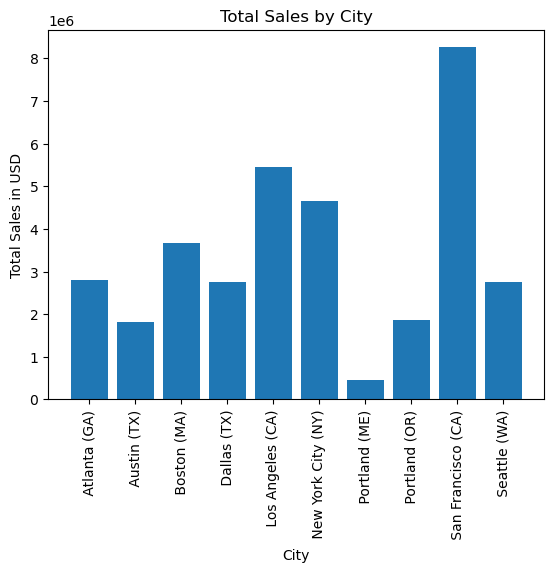

In [52]:
plt.bar(city_group.index, city_group["Sales"])

plt.xlabel("City")
plt.ylabel("Total Sales in USD")
plt.title("Total Sales by City")
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability

plt.show()

#### With Graph we can also see that San Francisco(CA) has highest sales and Portland(ME) has Lowest Sales 

#### Finding best time to display advertisements to maximize the likelihood of purchases

In [53]:
# Finding Which time we ad more sales
# Making hour and Minute Column

df["Hour"] = df["Order Date"].dt.hour

In [54]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",January,2.99,Boston (MA),21
1,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",January,300.00,Atlanta (GA),14
2,144296,Lightning Charging Cable,1,14.95,2019-01-16 12:03:00,"946 Maple St, New York City, NY 10001",January,14.95,New York City (NY),12
3,144295,USB-C Charging Cable,1,11.95,2019-01-15 14:39:00,"340 Madison St, San Francisco, CA 94016",January,11.95,San Francisco (CA),14
4,144294,Google Phone,1,600.00,2019-01-13 09:56:00,"306 14th St, Los Angeles, CA 90001",January,600.00,Los Angeles (CA),9


In [55]:
hour_group = df.groupby("Hour").count()

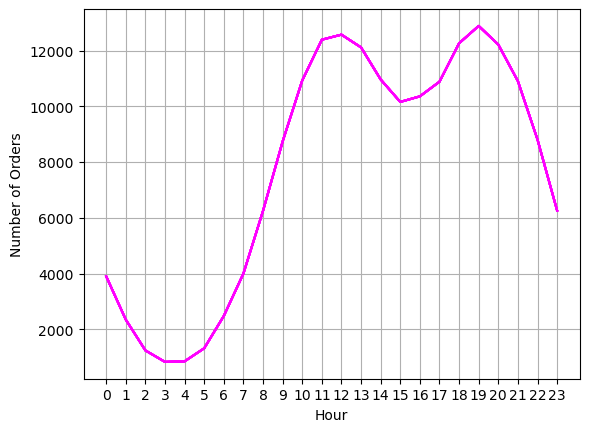

In [56]:
plt.plot(hour_group.index, hour_group, color="magenta")
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.xticks(hour_group.index)
plt.grid()

plt.show()

#### My recommendation is around 12 PM (12) or 7PM (19) 

## What Products are most often sold together

keep = " "

first : Mark duplicates as True except for the first occurrence.  
  
last : Mark duplicates as True except for the last occurrence.  
  
False : Mark all duplicates as True.  

In [57]:
duplicate_df = df[df["Order ID"].duplicated(keep = False)]

In [58]:
duplicate_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
65,144271,Lightning Charging Cable,1,14.95,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",January,14.95,San Francisco (CA),23
66,144271,iPhone,1,700.00,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",January,700.00,San Francisco (CA),23
132,144339,iPhone,1,700.00,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",January,700.00,Los Angeles (CA),14
141,144344,USB-C Charging Cable,1,11.95,2019-01-25 22:26:00,"188 14th St, Boston, MA 02215",January,11.95,Boston (MA),22
142,144344,Google Phone,1,600.00,2019-01-25 22:26:00,"188 14th St, Boston, MA 02215",January,600.00,Boston (MA),22


In [59]:
duplicate_df["Grouped"] = duplicate_df.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))

C:\Users\Shivam\AppData\Local\Temp\ipykernel_4964\1679950058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df["Grouped"] = duplicate_df.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))


In [60]:
duplicate_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
65,144271,Lightning Charging Cable,1,14.95,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",January,14.95,San Francisco (CA),23,"Lightning Charging Cable,iPhone"
66,144271,iPhone,1,700.00,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",January,700.00,San Francisco (CA),23,"Lightning Charging Cable,iPhone"
132,144339,iPhone,1,700.00,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",January,700.00,Los Angeles (CA),14,"iPhone,Wired Headphones"
141,144344,USB-C Charging Cable,1,11.95,2019-01-25 22:26:00,"188 14th St, Boston, MA 02215",January,11.95,Boston (MA),22,"USB-C Charging Cable,Google Phone"
142,144344,Google Phone,1,600.00,2019-01-25 22:26:00,"188 14th St, Boston, MA 02215",January,600.00,Boston (MA),22,"USB-C Charging Cable,Google Phone"


In [61]:
duplicate_df = duplicate_df[["Order ID", "Grouped"]].drop_duplicates()

In [62]:
duplicate_df.head()

,Order ID,Grouped
65,144271,"Lightning Charging Cable,iPhone"
132,144339,"iPhone,Wired Headphones"
141,144344,"USB-C Charging Cable,Google Phone"
303,144394,"Google Phone,Wired Headphones"
306,144584,"USB-C Charging Cable,Google Phone"


In [63]:
from itertools import combinations
from collections import Counter

In [64]:
count = Counter()

for row in duplicate_df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key, value)
    

('Lightning Charging Cable', 'iPhone') 523
('USB-C Charging Cable', 'Google Phone') 519
('iPhone', 'Lightning Charging Cable') 488
('Google Phone', 'USB-C Charging Cable') 478
('Wired Headphones', 'iPhone') 248
('Wired Headphones', 'Google Phone') 231
('iPhone', 'Wired Headphones') 214
('USB-C Charging Cable', 'Vareebadd Phone') 195
('Google Phone', 'Wired Headphones') 191
('iPhone', 'Apple Airpods Headphones') 190


#### What product sold most

In [65]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [66]:
product_group = df.groupby("Product").sum()
product_group["Quantity Ordered"].sort_values(ascending = False)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_4964\2133790666.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group = df.groupby("Product").sum()


Product
AAA Batteries (4-pack)        30986
AA Batteries (4-pack)         27615
USB-C Charging Cable          23931
Lightning Charging Cable      23169
Wired Headphones              20524
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
27in FHD Monitor               7541
iPhone                         6847
27in 4K Gaming Monitor         6239
34in Ultrawide Monitor         6192
Google Phone                   5529
Flatscreen TV                  4813
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
20in Monitor                   4126
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

#### Most Product Sold is AAA Batteries(4-pack)

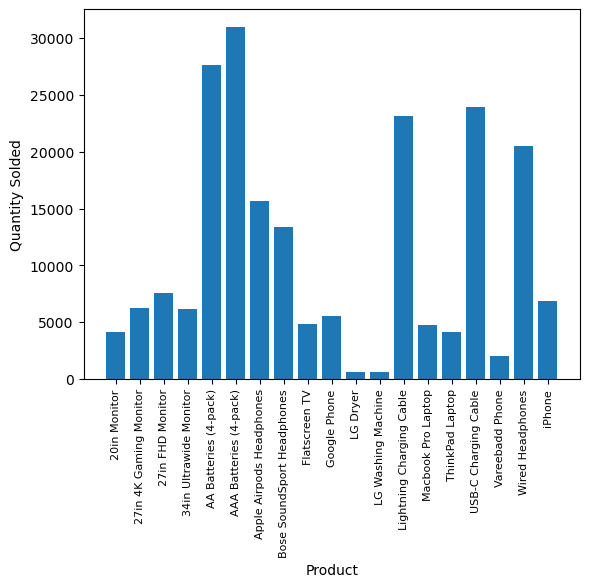

In [67]:
plt.bar(product_group.index, product_group["Quantity Ordered"])
plt.xlabel("Product")
plt.ylabel("Quantity Solded")
plt.xticks(rotation = 90, size = 8)
plt.show()

#### With Graph also we can see that Most Product Sold is "AAA Batteries(4-pack)"

### Trying to find why AAA Batteries(4-pack) has higher ordered Quantity

In [68]:
prices = df.groupby("Product").mean()
prices["Price Each"].sort_values(ascending= False)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_4964\2198889548.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby("Product").mean()


Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64

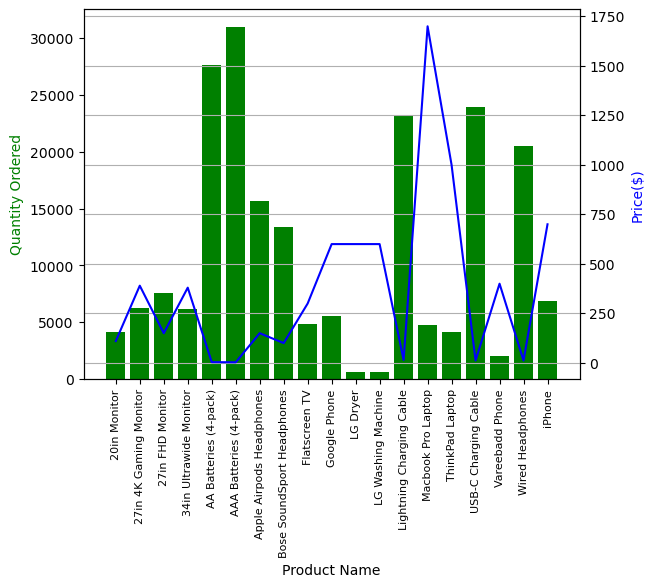

In [69]:
ax1 = plt.subplot()
ax2 = ax1.twinx()
plt.grid()
ax1.bar(product_group.index, product_group["Quantity Ordered"], color = 'g')
ax2.plot(prices.index, prices["Price Each"], color = 'b')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color = 'g')

ax2.set_ylabel("Price($)", color = 'b')
ax1.set_xticks(product_group.index)
ax1.set_xticklabels(product_group.index, rotation=90, size=8)
plt.show()


1. **Graph Description**:
   - The image displays a bar graph overlaid with a line graph.
   - The x-axis represents different products, including "27in 4K Gaming Monitor," "34in Ultrawide Monitor," "AA Batteries (4-pack)," "AAA Batteries (4-pack)," and more.
   - The y-axis on the left side corresponds to the "Quantity Ordered," ranging from 0 to 30,000.
   - The y-axis on the right side corresponds to the "Prices" in dollars ($), ranging from 0 to 1,750.
   - The green bars represent the quantity ordered for each product.
   - The blue line represents the prices of these products.

2. **Observations**:
   - There isn't a clear linear correlation between the quantity ordered and the price.
   - For instance:
     - **AA Batteries (4-pack)** have a high quantity ordered but a relatively low price.
     - **MacBook Pro Laptop** has a lower quantity ordered but a significantly higher price.

3. **Correlation**:
   - Based on the graph, we can infer that price alone does not directly determine the quantity ordered.
   - Other factors, such as product demand, marketing strategies, and consumer preferences, likely influence the purchasing decisions.